In [65]:
import random
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
from scipy.spatial.transform import Rotation as R

In [53]:
from brainbot.plan.samplers import *
from brainbot.plan.regions import *
from brainbot.utils.tf import *
from brainbot.constants import *

# Visualize grid

In [9]:
# Reset sampler each time
sampler = DeterministicGridSampler([0,0,0], [1,1,1], [10,10,10])

xs = []
ys = []
zs = []
num_samples = 5000

for i in range(num_samples):
    x,y,z = sampler.next() 
    xs.append(x)
    ys.append(y)
    zs.append(z)
    

/tmp/ipykernel_212758/3767745649.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


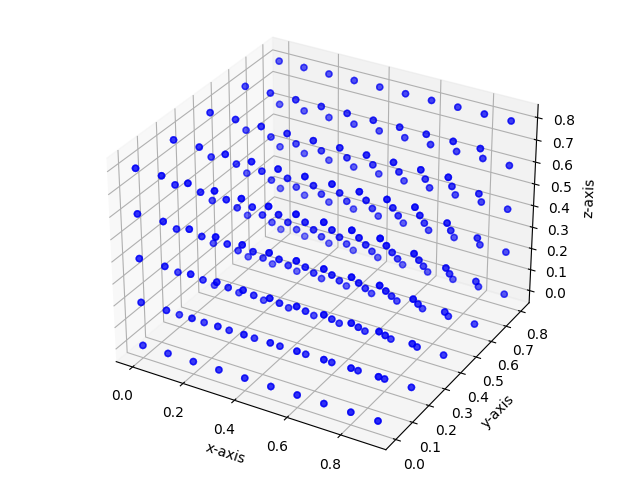

In [10]:
%matplotlib widget

# creating figure
fig = plt.figure()
ax = Axes3D(fig)
  
# creating the plot
plot_geeks = ax.scatter(xs, ys, zs, color=[0,0,1,0.1])
# plot_geeks = ax.scatter(xs_o, ys_o, zs_o, color=[1,0,0,0.1])
  
# setting title and labels
ax.set_title("Cylinder Sampling")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
  
# displaying the plot
plt.show()

# Visualize grid sampler inside cyl

In [8]:
cyl = Cyl(1, 1, toTransform([0,0,0],[0,0,0]))

In [15]:
# Reset sampler each time
sampler = RegionGridSampler(cyl, [40,40,30])

xs = []
ys = []
zs = []
num_samples = 5000

for i in range(num_samples):
    x,y,z = sampler.next() 
    xs.append(x)
    ys.append(y)
    zs.append(z)
    

/tmp/ipykernel_190641/3767745649.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


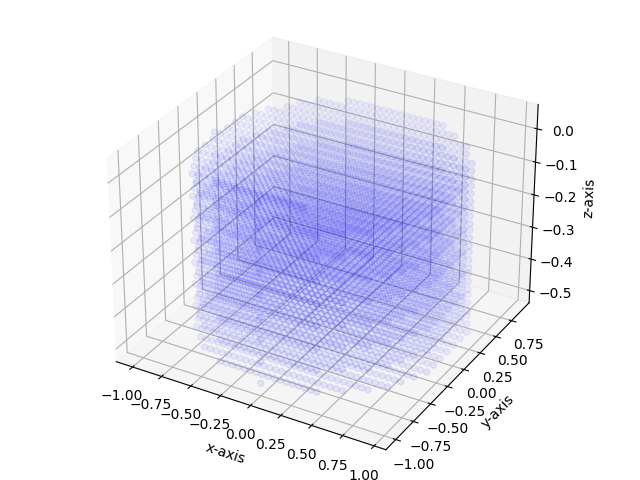

In [16]:
%matplotlib widget

# creating figure
fig = plt.figure()
ax = Axes3D(fig)
  
# creating the plot
plot_geeks = ax.scatter(xs, ys, zs, color=[0,0,1,0.1])
# plot_geeks = ax.scatter(xs_o, ys_o, zs_o, color=[1,0,0,0.1])
  
# setting title and labels
ax.set_title("Cylinder Sampling")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
  
# displaying the plot
plt.show()

In [11]:
def validity(test):
    return test > 4

# Test random orientations

In [116]:
rng = default_rng()

sign = -1 if rng.random() > 0.5 else 1
val = sign * rng.random()
print(f"Random val {val}")

Random val -0.02614745692941134


In [144]:
# Sample orientation in top half sphere
orien_vec = []
for _ in range(3):
    sign = -1 if rng.random() > 0.5 else 1
    val = sign * rng.random()
    orien_vec.append(val)
    
orien_vec[2] = abs(orien_vec[2])
print(f"Random orientation vector {orien_vec}")

r_z = R.from_rotvec(np.array([0,0,1]) * (np.arctan2(orien_vec[1], orien_vec[0])))
r_y = R.from_rotvec(np.array([0,1,0])  * (np.arctan2(np.sqrt(orien_vec[0] ** 2 + orien_vec[1] ** 2), orien_vec[2])))
r_z_2 = R.from_rotvec(np.array([0,0,1]) * 2 * PI * rng.random())

r = r_z * r_y * r_z_2
r.as_quat()

Random orientation vector [0.3044508013008195, -0.19458346350581623, 0.7164053199726166]


array([ 0.10741155,  0.20501026, -0.08364472,  0.96924564])

In [150]:
# Sample random orientation
r = R.random()

/tmp/ipykernel_212758/2056330210.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


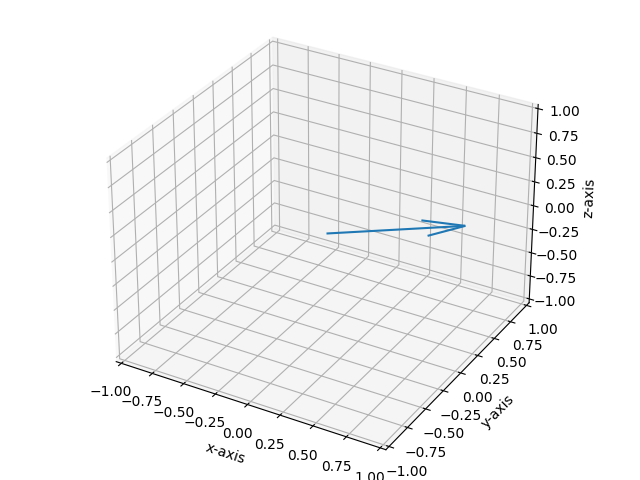

In [151]:
%matplotlib widget

z_vec = np.array([0,0,1])
z_rot = np.matmul(r.as_matrix(), z_vec)

x_origin = [0]
y_origin = [0]
z_origin = [0]

x_tip = [z_rot[0]]
y_tip = [z_rot[1]]
z_tip = [z_rot[2]]

# creating figure
fig = plt.figure()
ax = Axes3D(fig)
  
# creating the plot
ax.quiver(x_origin, y_origin, z_origin, x_tip, y_tip, z_tip)
  
# setting title and labels
ax.set_title("Cylinder Sampling")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
  
# displaying the plot
plt.show()

In [124]:
Z

(1.0, 2.0, 3.0, 4.0)